In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Classified Data to Classified Data


In [0]:
import io

In [0]:
df = pd.read_csv(io.StringIO(uploaded['Classified Data'].decode('utf-8')), index_col=0)

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scale = StandardScaler()

In [14]:
scale.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features = scale.transform(df.drop('TARGET CLASS', axis = 1))

In [0]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [19]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101) 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [0]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

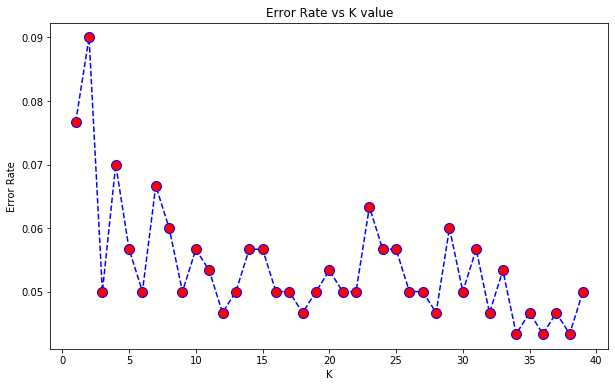

In [33]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[155   4]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

